In [19]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [20]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)


Use `least_squares` to compute w, and visualize the results.

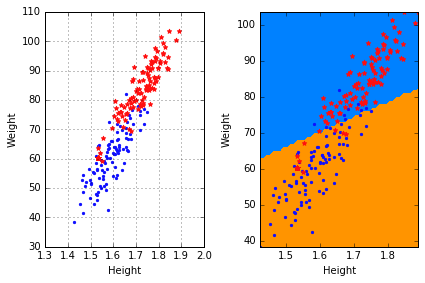

In [21]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y,tx)
    #raise NotImplementedError
    
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [22]:
def sigmoid(t):
    """apply sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    #raise NotImplementedError
    return 1/(1+np.exp(-t))

In [23]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    #raise NotImplementedError
    temp=0
    loss=0
    prod=tx.dot(w)
    for i in range(len(y)):
       # temp=np.log(1+np.exp(tx[i,:].T.dot(w)))-y[i]*(tx[i,:].T.dot(w))
        temp=np.log(1+np.exp(prod[i]))-y[i]*(prod[i])
        loss=loss+temp
    return loss

In [24]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    #raise NotImplementedError
 
    # sum de temp=1/(1+np.exp(prod[i]))*tx[i,:]*np.exp(prod[i])-y[i]*tx[i,:];
    grad=tx.T.dot(sigmoid(tx.dot(w))-y)

       
    return grad

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [25]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the cost: TODO
    # ***************************************************
    # raise NotImplementedError
    loss=calculate_loss(y,tx,w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    grad=calculate_gradient(y,tx,w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w=w-gamma*grad
    
    return loss, w

Demo!

Current iteration=0, the loss=[ 138.62943611]
Current iteration=1000, the loss=[ 43.49258275]
Current iteration=2000, the loss=[ 41.55453652]
Current iteration=3000, the loss=[ 41.10170781]
Current iteration=4000, the loss=[ 40.96605044]
Current iteration=5000, the loss=[ 40.92056156]
Current iteration=6000, the loss=[ 40.90438018]
Current iteration=7000, the loss=[ 40.89842938]
Current iteration=8000, the loss=[ 40.89619782]
Current iteration=9000, the loss=[ 40.89535113]
The loss=[ 40.89502758]


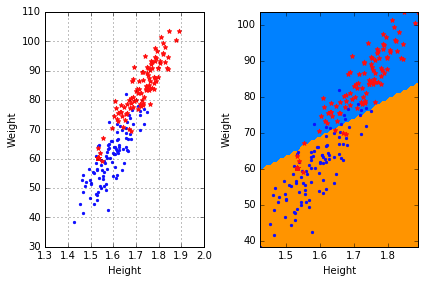

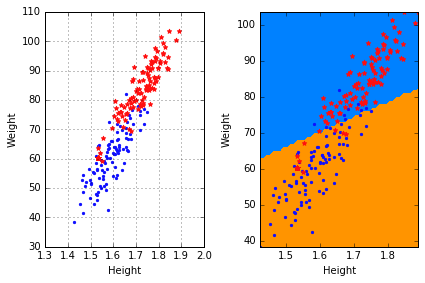

In [27]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.001
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)
least_square_classification_demo(y, x)

Calculate your hessian below

In [28]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate hessian: TODO
    # ***************************************************
    #raise NotImplementedError
    temp1=sigmoid(tx.dot(w))
    temp2=np.ones(len(tx))-(sigmoid(tx.dot(w)))
    temp3=np.multiply(temp1,temp2)
    S=np.diag(temp3[:,0])
    Hess=tx.T.dot(S).dot(tx)
    return Hess

Write a function below to return loss, gradient, and hessian.

In [29]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************

    loss=calculate_loss(y,tx,w)
    gradient=calculate_gradient(y,tx,w)
    hessian=calculate_hessian(y,tx,w)
    
    return loss, gradient, hessian
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))
logistic_regression(y,tx,w)

(array([ 138.62943611]), array([[ -2.        ],
        [ 68.74603697],
        [ 79.61302092]]), array([[  5.00000000e+01,  -7.79376563e-14,   7.69384556e-14],
        [ -7.79376563e-14,   5.00000000e+01,   4.60676209e+01],
        [  7.69384556e-14,   4.60676209e+01,   5.00000000e+01]]))

### Using Newton method
Use Newton method for logistic regression.

In [13]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    loss, gradient, hessian=logistic_regression(y,tx,w)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    w=w-gamma*np.linalg.inv(hessian).dot(gradient)
    # ***************************************************
    return loss, w

demo

(200, 2)
(200, 3)
Current iteration=0, the loss=[ 138.62943611]
Current iteration=500, the loss=[ 40.96438279]
Current iteration=1000, the loss=[ 40.89482895]
The loss=[ 40.89482609]


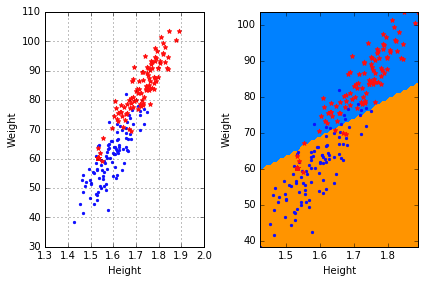

In [14]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [15]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    loss=calculate_loss(y,tx,w) +lambda_*np.power(np.linalg.norm(w),2)
    grad=calculate_gradient(y,tx,w)+lambda_*2*w
    hess=calculate_hessian(y,tx,w)+lambda_*2*np.eye(len(w),len(w))
    return loss, grad, hess

In [16]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.  Newton mode
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    loss, gradient, hessian=penalized_logistic_regression(y,tx,w,lambda_)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w=w-gamma*np.linalg.inv(hessian).dot(gradient)

    return loss, w

(200, 3)
Current iteration=0, the loss=[ 138.62943611]
Current iteration=500, the loss=[ 45.05192051]
Current iteration=1000, the loss=[ 45.01072049]
The loss=[ 41.80555582]


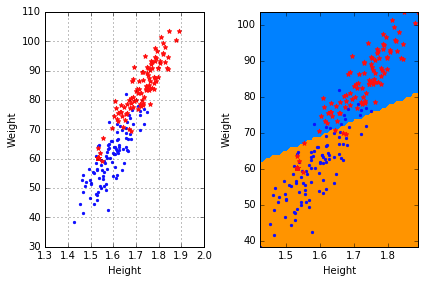

In [18]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    print(tx.shape)

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)